<div style=" background-color: RGB(0,114,200);" >
<h1 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">MACHINE LEARNING</h1>
<h2 style="margin: auto; padding: 20px 0; color:#fff; text-align: center">Détection de faux billets
</h2>
</div>

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; "> Analyse Exploratoire du Titanic</h2>
</div>

<div style="border: 2px solid rgb(0,150,250); padding: 15px; margin-top: 10px;">
  <h3 style="margin: 0; color: rgb(0,150,250);">Importation des librairies</h3>
</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,adjusted_rand_score,roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("billets.csv",sep =";")

In [3]:
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [4]:
df["is_genuine"].value_counts(normalize = True)

is_genuine
True     0.666667
False    0.333333
Name: proportion, dtype: float64

In [5]:
df.shape

(1500, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
diagonal,1500.0,171.958440,0.305195,171.04,171.750,171.96,172.17,173.01
height_left,1500.0,104.029533,0.299462,103.14,103.820,104.04,104.23,104.88
height_right,1500.0,103.920307,0.325627,102.82,103.710,103.92,104.15,104.95
margin_low,1463.0,4.485967,0.663813,2.98,4.015,4.31,4.87,6.90
margin_up,1500.0,3.151473,0.231813,2.27,2.990,3.14,3.31,3.91
length,1500.0,112.678500,0.872730,109.49,112.030,112.96,113.34,114.44


In [8]:
df.isna().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

La colonne margin_low contient des valeurs manquantes


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; "> Nettoyage des données</h2>
</div>

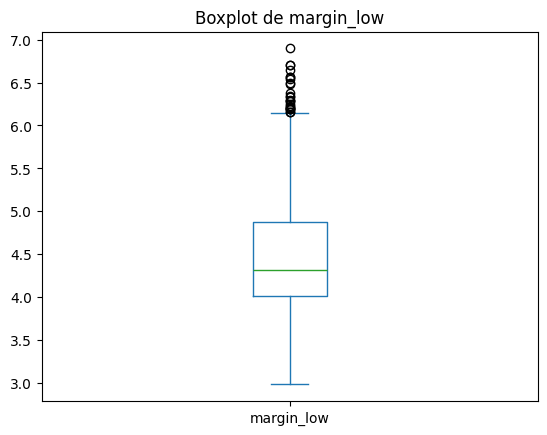

In [10]:
df["margin_low"].plot(kind ="box")
plt.title("Boxplot de margin_low")
plt.show()

L'analyse de ce boxplot nous permet de voir que la variable explicative "margin_low" contient des outliers.
Les valeus manquantes seront donc imputées en utilisant la mßediane de cette colonne

In [7]:
"""
Q1 = df["margin_low"].quantile(0.25)
Q3 = df["margin_low"].quantile(0.75)
IQR = Q3 - Q1

# Valeurs aberrantes
outliers = df[(df["margin_low"] < Q1 - 1.5 * IQR) | (df["margin_low"] > Q3 + 1.5 * IQR)]
print(f"Nombre d'outliers : {len(outliers)}")
"""



Nombre d'outliers : 24


In [11]:
# Remplacement des valeurs manquantes de margin_low
df["margin_low"] = df["margin_low"].fillna(df["margin_low"].median())

In [12]:
df.isna().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

Nettoyage 

<Axes: xlabel='is_genuine', ylabel='count'>

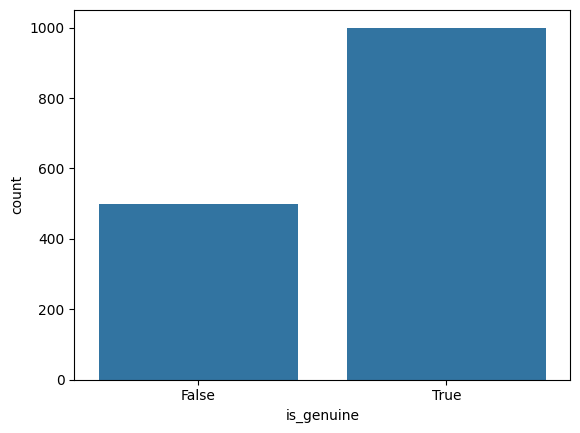

In [13]:
#variable cible
sns.countplot(data = df,x= "is_genuine")

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; "> Visualisation des données</h2>
</div>

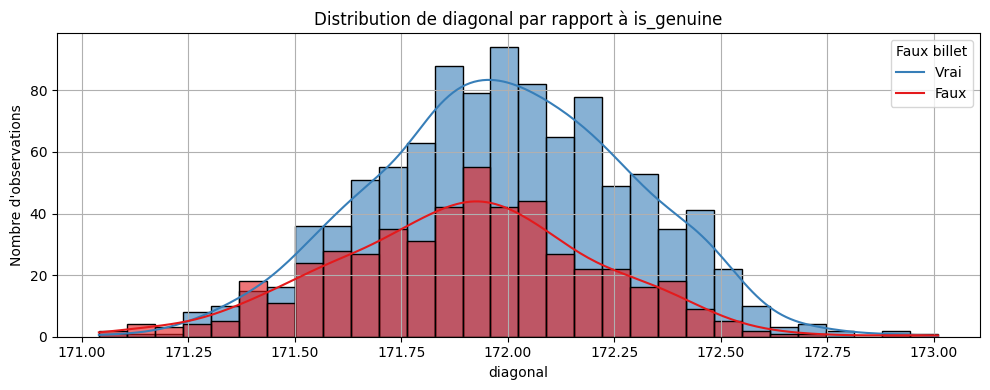

Statistiques de 'diagonal':
             count       mean       std     min     25%     50%       75%  \
is_genuine                                                                  
False        500.0  171.90116  0.306861  171.04  171.69  171.91  172.0925   
True        1000.0  171.98708  0.300441  171.04  171.79  171.99  172.2000   

               max  
is_genuine          
False       173.01  
True        172.92   



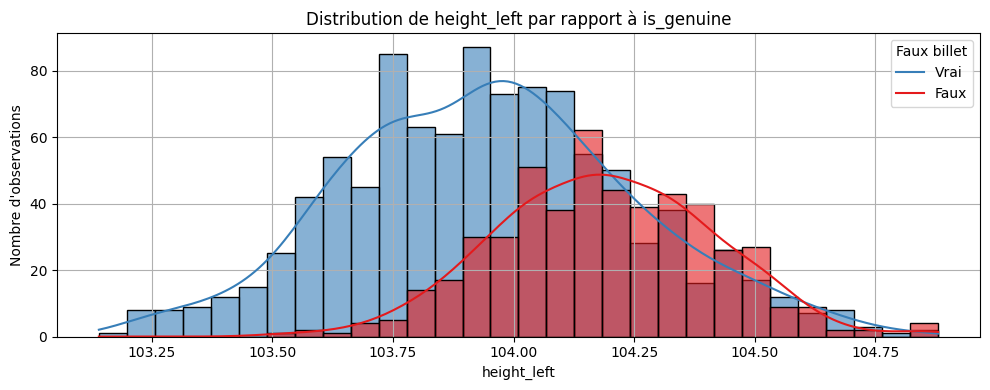

Statistiques de 'height_left':
             count       mean       std     min     25%     50%       75%  \
is_genuine                                                                  
False        500.0  104.19034  0.223758  103.51  104.04  104.18  104.3325   
True        1000.0  103.94913  0.300231  103.14  103.74  103.95  104.1400   

               max  
is_genuine          
False       104.88  
True        104.86   



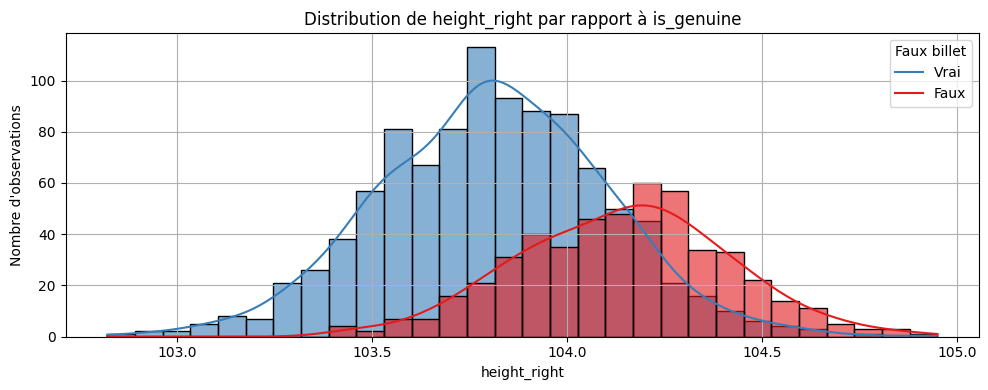

Statistiques de 'height_right':
             count       mean       std     min     25%     50%     75%  \
is_genuine                                                                
False        500.0  104.14362  0.270878  103.43  103.95  104.16  104.32   
True        1000.0  103.80865  0.291570  102.82  103.61  103.81  104.00   

               max  
is_genuine          
False       104.95  
True        104.95   



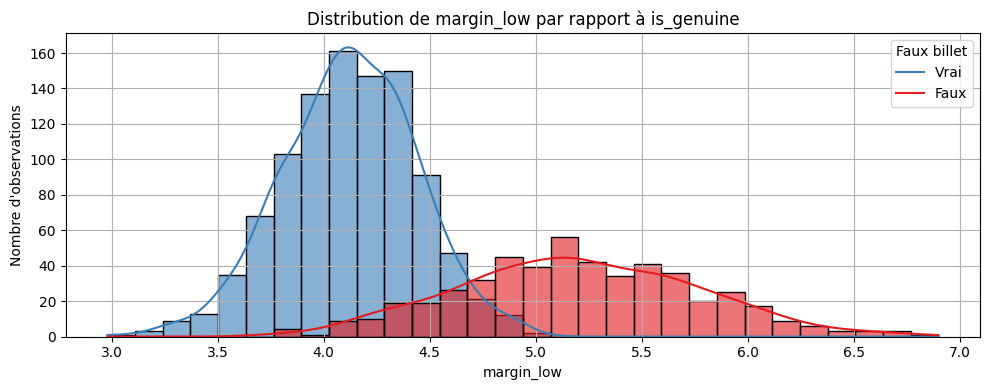

Statistiques de 'margin_low':
             count     mean       std   min   25%   50%   75%   max
is_genuine                                                         
False        500.0  5.20144  0.560742  3.82  4.81  5.18  5.59  6.90
True        1000.0  4.12172  0.316139  2.98  3.91  4.12  4.33  5.04 



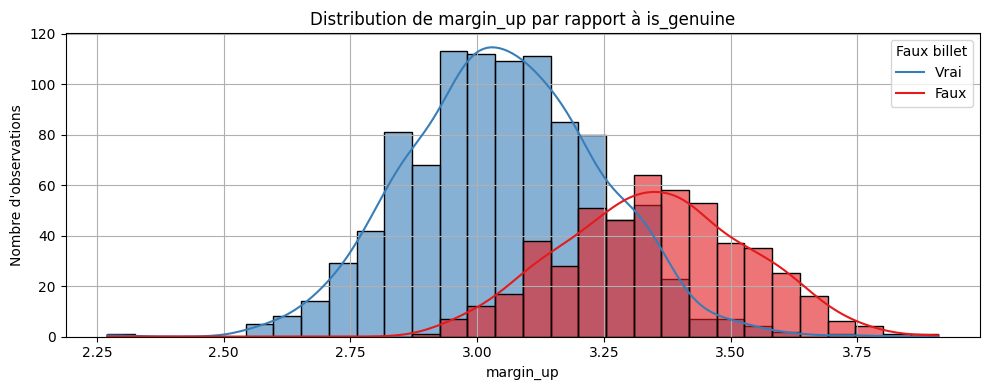

Statistiques de 'margin_up':
             count     mean       std   min   25%   50%     75%   max
is_genuine                                                           
False        500.0  3.35016  0.180498  2.92  3.22  3.35  3.4725  3.91
True        1000.0  3.05213  0.186340  2.27  2.93  3.05  3.1800  3.74 



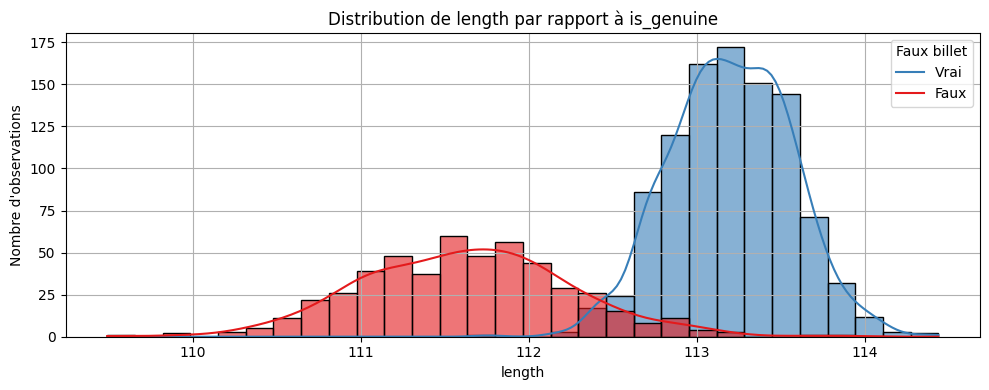

Statistiques de 'length':
             count       mean       std     min     25%      50%     75%  \
is_genuine                                                                 
False        500.0  111.63064  0.615543  109.49  111.20  111.630  112.03   
True        1000.0  113.20243  0.359552  111.76  112.95  113.205  113.46   

               max  
is_genuine          
False       113.85  
True        114.44   



In [14]:



colonnes = ['diagonal', 'height_left', 'height_right', 'margin_low','margin_up','length']

for colonne in colonnes:
    plt.figure(figsize=(10, 4))
    
    # Histogramme par classe
    sns.histplot(data=df, x=colonne, hue='is_genuine', kde=True, bins=30, palette='Set1', alpha=0.6)
    plt.title(f'Distribution de {colonne} par rapport à is_genuine')
    plt.xlabel(colonne)
    plt.ylabel("Nombre d'observations")
    plt.legend(title="Faux billet", labels=["Vrai", "Faux"])
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Statistiques descriptives
    print(f"Statistiques de '{colonne}':")
    print(df.groupby("is_genuine")[colonne].describe(), "\n")


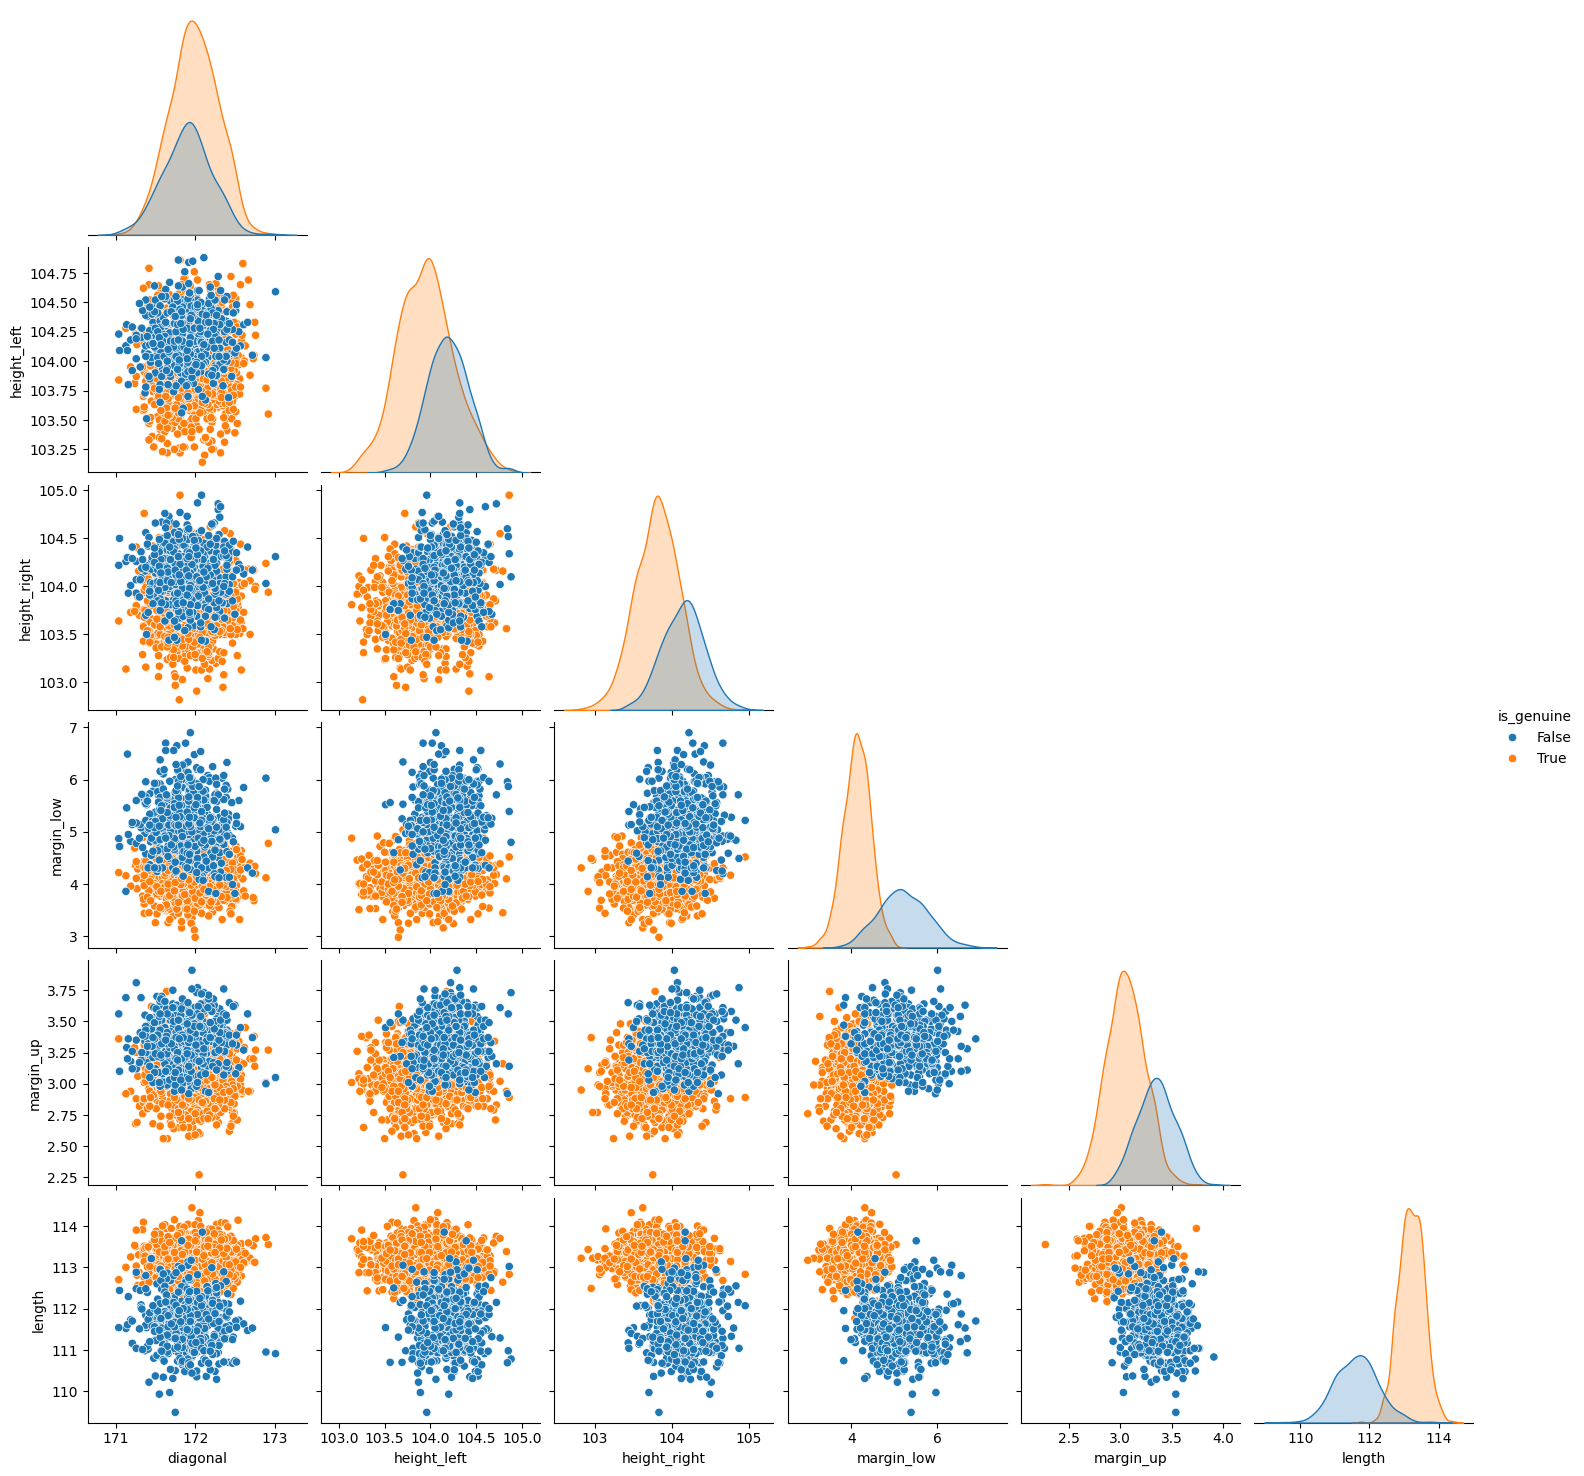

In [10]:
pp=sns.pairplot(df, hue='is_genuine', corner=True)

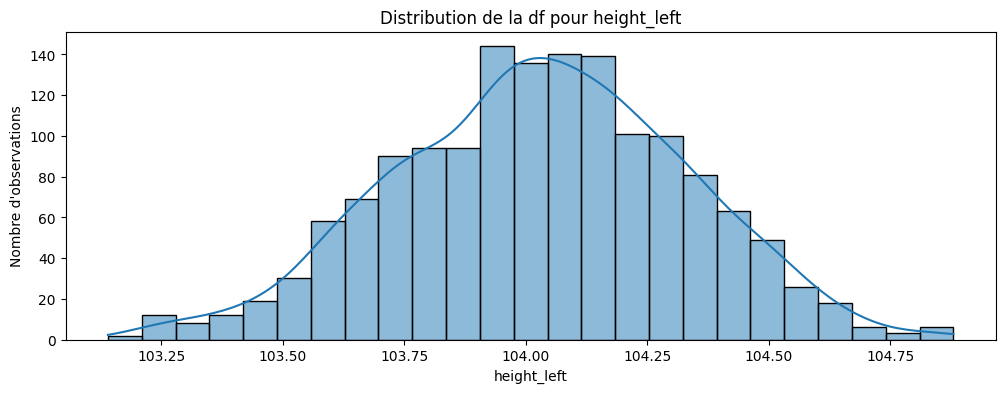

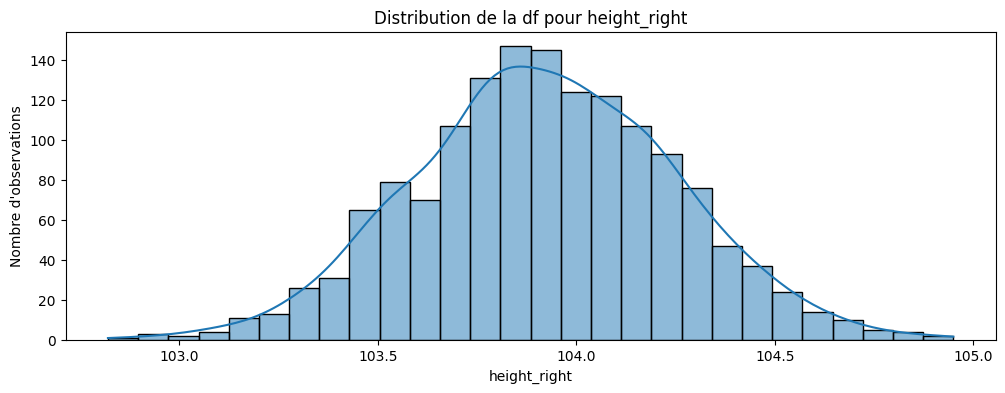

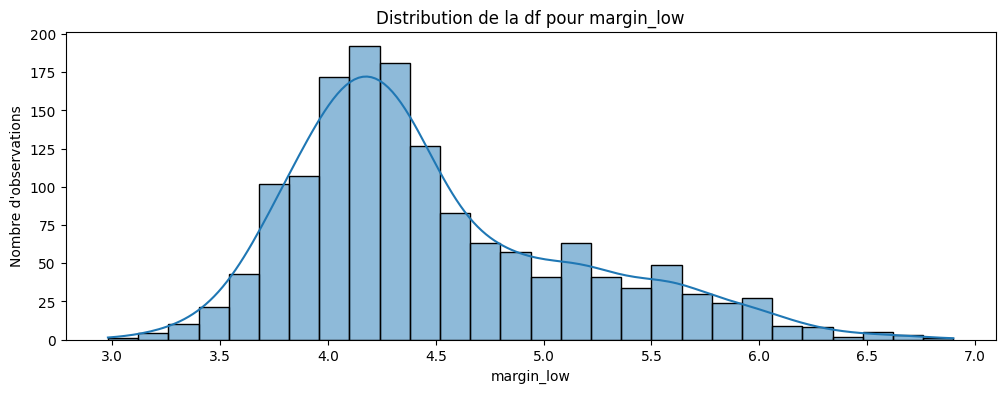

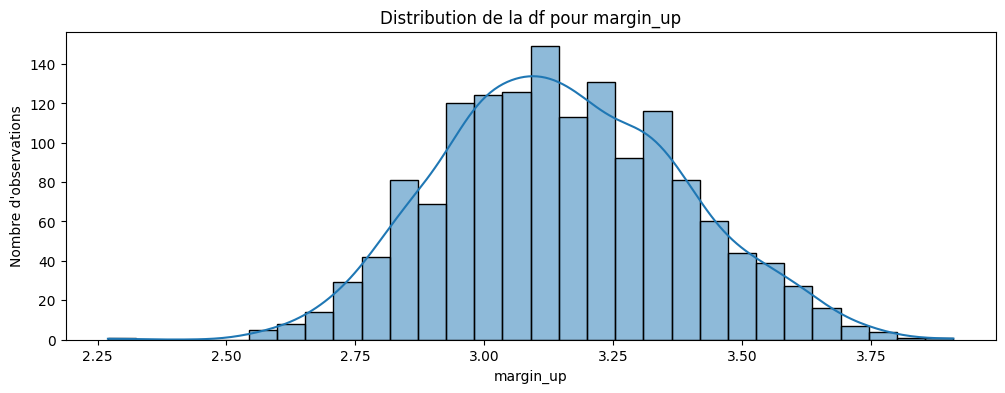

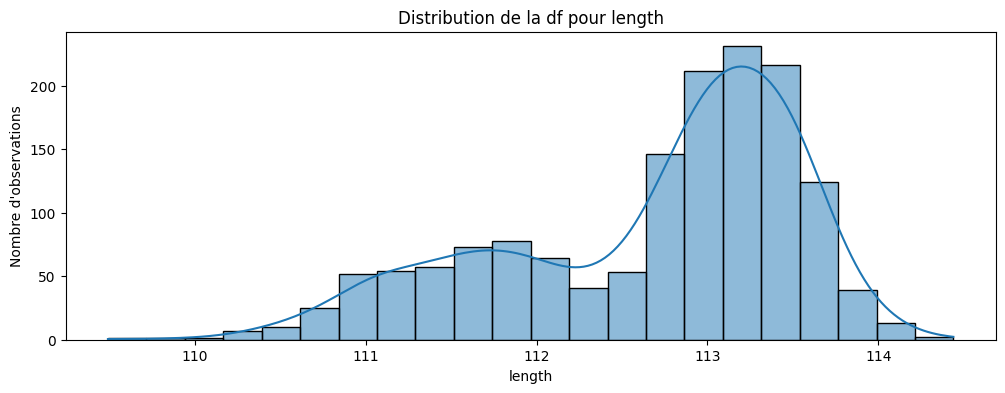

In [11]:
for col in df.columns[2:]:
    fig, ax = plt.subplots(1,1,figsize=(12,4))
    sns.histplot(data=df, x=col,kde = True)
    plt.title(f"Distribution de la df pour {col}")
    plt.ylabel("Nombre d'observations")
    plt.show()

In [ ]:
# Analyses

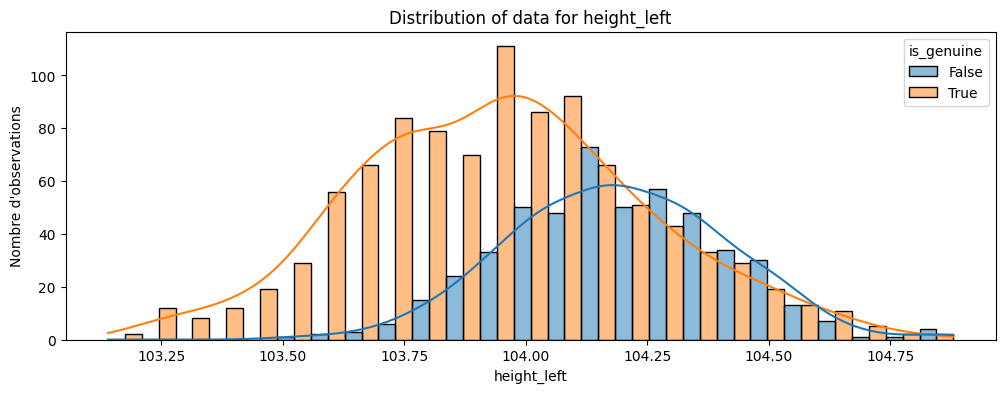

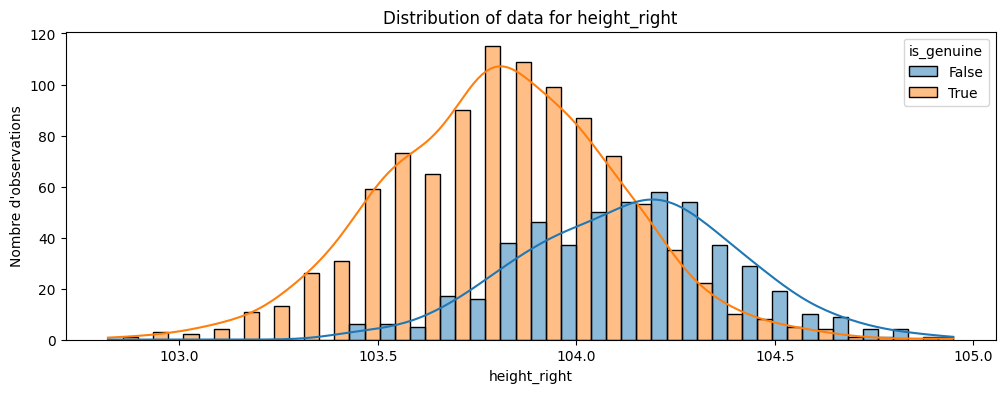

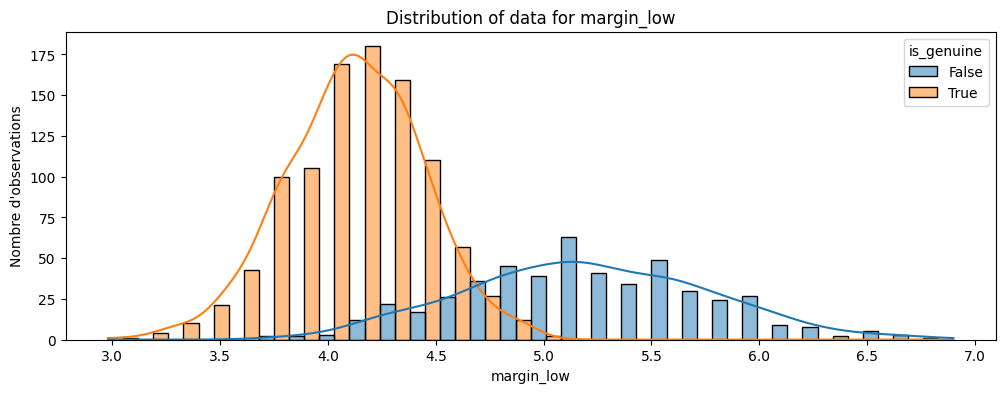

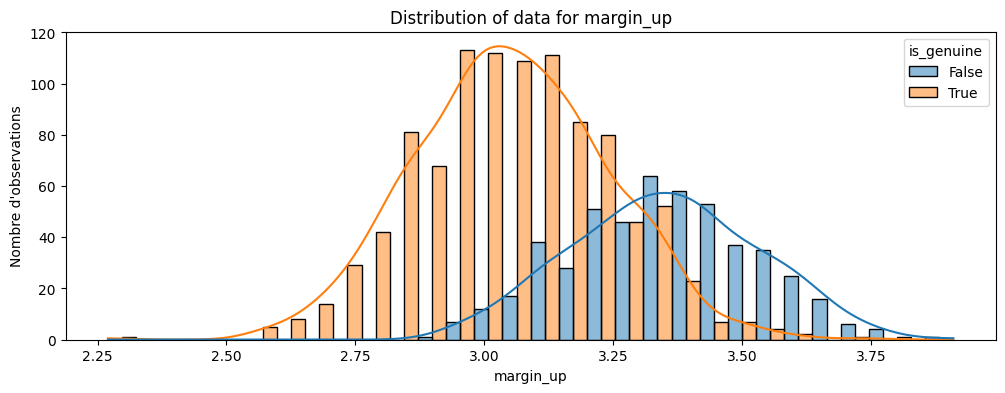

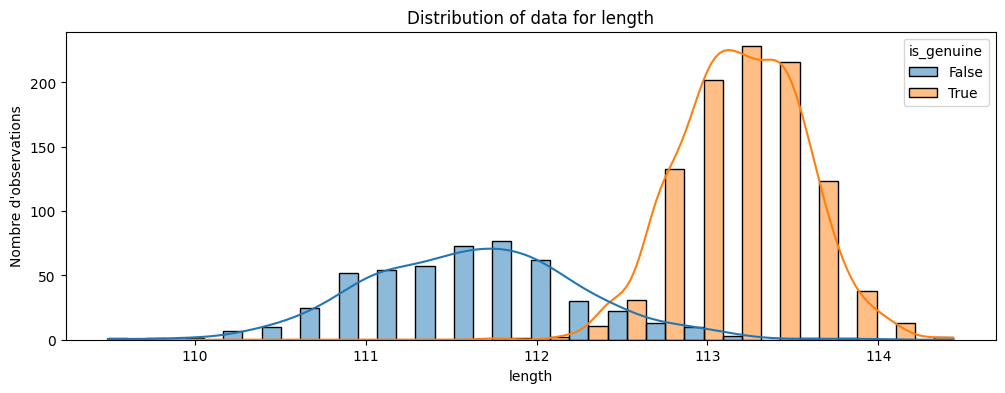

In [12]:
for col in df.columns[2:]:
    fig, ax = plt.subplots(1,1,figsize=(12,4))
    sns.histplot(data=df, x=col, hue='is_genuine', multiple='dodge',kde = True)
    plt.title(f"Distribution of data for {col}")
    plt.ylabel("Nombre d'observations")
    plt.show()

Analyses
L'analyse des histogrammes plus haut permet de dire que la variable explicative "length" permet de bien classifier la nature(vrai ou faux d'un billet).En effet, les faux billets ont tendance a avoir un "length" relativement plus petit que les vrais billets.
Quand à la variable "margin_up",les

Nettoyage

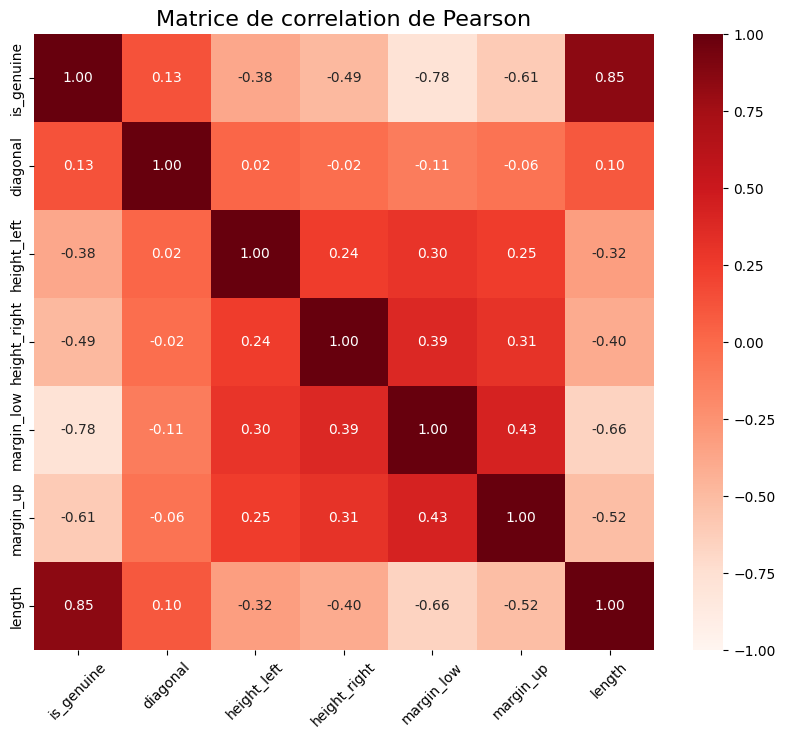

In [15]:
correlogram =df.corr()
# visualisation de la matrice de correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlogram,vmin = -1, vmax = 1,cmap = "Reds",annot = True, fmt = '.2f')
plt.title('Matrice de correlation de Pearson', fontsize=16)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
# essayer pca

In [16]:
#verification multicolinéarité
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# X = DataFrame contenant uniquement les variables explicatives


X = add_constant(X)  # Ajout de la constante

vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

NameError: name 'X' is not defined


<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; "> Préparation des données</h2>
</div>

Après l'analyse des correlations dans la matrice de correlation ,les variables explicatives à très forte correlation comme "length" et à faible correlation telles que "diagonal" seront enlevées .Quand aux variables "margin_low "et "margin_up" , elles sont correlées entre elle (bien que la correlation soit modérée:0.43). pour donc éviter des problèmes de multicoloinéarité conduisant à un overfitting,l'une d'entre elles sera gardée notamment la plus correlée à la variable cible: "margin_low2.

In [17]:
df_prediction = df.drop(columns = ["diagonal","length","margin_up","height_left"]).copy()


In [16]:
df_prediction.head()

,is_genuine,height_right,margin_low
0,True,104.95,4.52
1,True,103.66,3.77
2,True,103.50,4.40
3,True,103.94,3.62
4,True,103.46,4.04


In [17]:
#Normalisation
#standardiseur = StandardScaler()

In [18]:
X = df_prediction.drop(columns =["is_genuine"])
y = df_prediction["is_genuine"].astype(int)
X.shape

(1500, 2)

In [79]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,stratify =y,shuffle = True,random_state = 42 )

In [20]:

#split en 3

# Étape 1 : split train + temp (val + test)
"""X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    test_size=0.4,          # 40 % iront dans val + test
    stratify=y,
    shuffle=True,
    random_state=42
)

# Étape 2 : split val + test à partir de X_temp
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,          # 50 % de 40 % => 20 % du total
    stratify=y_temp,
    shuffle=True,
    random_state=42
)
"""

'X_train, X_temp, y_train, y_temp = train_test_split(\n    X, y,\n    test_size=0.4,          # 40 % iront dans val + test\n    stratify=y,\n    shuffle=True,\n    random_state=42\n)\n\n# Étape 2 : split val + test à partir de X_temp\nX_val, X_test, y_val, y_test = train_test_split(\n    X_temp, y_temp,\n    test_size=0.5,          # 50 % de 40 % => 20 % du total\n    stratify=y_temp,\n    shuffle=True,\n    random_state=42\n)\n'

In [20]:
# Normalisation
#X_train_standardise = standardiseur.fit_transform(X_train)
#X_val_standardise = standardiseur.fit_transform(X_val)

#X_test_standardise =  standardiseur.transform(X_test)

<div style="background-color: RGB(0,150,250);" >
<h2 style="margin: auto; padding: 20px; color:#fff; "> Modélisation des données</h2>
</div>

<div style="border: 2px solid rgb(0,150,250); padding: 15px; margin-top: 10px;">
  <h3 style="margin: 0; color: rgb(0,150,250);">Regression logistique</h3>
</div>

In [90]:
#model_log = LogisticRegression(solver = "liblinear",class_weight = "balanced")
from sklearn.pipeline import Pipeline

pipeline_log = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(solver = "liblinear",class_weight = "balanced",max_iter=1000))
])


In [91]:
#model_log.fit(X_train_standardise,y_train)
pipeline_log.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000,
                                    solver='liblinear'))])

In [92]:
#y_pred_log = pipeline_log.predict(X_test_standardise)
#y_pred_proba_log = pipeline_log.predict_proba(X_test_standardise)
y_pred_log = pipeline_log.predict(X_test)
y_pred_proba_log = pipeline_log.predict_proba(X_test)

In [93]:
rapport_classification = classification_report(y_test,y_pred_log)
matrice_confusion = confusion_matrix(y_pred_log,y_test)
auc = accuracy_score(y_test,y_pred_log)
print( "matrice de confusion:\n",matrice_confusion)
print( "\nrapport de classification :\n",rapport_classification)
print( "\naccuracy :\n",auc)

matrice de confusion:
 [[132  20]
 [ 18 280]]

rapport de classification :
               precision    recall  f1-score   support

           0       0.87      0.88      0.87       150
           1       0.94      0.93      0.94       300

    accuracy                           0.92       450
   macro avg       0.90      0.91      0.91       450
weighted avg       0.92      0.92      0.92       450


accuracy :
 0.9155555555555556


Le rapport de classification montre que le modèle arrive à bien détecter les deux classes avec un recall de 0,87 pour la classe minoritaire "faux billets" et un recall de 0,94 pour la classe "majoritaire".

In [94]:
#auc_roc
auc_roc_test= roc_auc_score(y_test,y_pred_proba_log[:,1])
print(auc_roc_test)

0.9724333333333333


In [95]:
y_train_log = pipeline_log.predict(X_train)
y_train_proba_log = pipeline_log.predict_proba(X_train)
auc_roc_train = roc_auc_score(y_train,y_train_proba_log[:,1])
print(auc_roc_train)

0.9689632653061224


In [29]:
"""# Combine train + val
#X_train_final = np.vstack((X_train, X_val))
#y_train_final = np.concatenate((y_train, y_val))

# Entraînement final
#model_log.fit(X_train_final, y_train_final)

# Prédiction sur test
y_test_proba = model_log.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_test_proba)
print(f"AUC sur test final : {test_auc:.4f}")
"""


AUC sur test final : 0.9991


/opt/anaconda3/envs/finances_venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


<div style="border: 2px solid rgb(0,150,250); padding: 15px; margin-top: 10px;">
  <h3 style="margin: 0; color: rgb(0,150,250);">KNeighborsClassifier</h3>
</div>

In [96]:
#model_knn = KNeighborsClassifier(n_neighbors = 5)

pipeline_knn = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsClassifier(n_neighbors = 5)
)])

In [100]:
!pip install statsmodels


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [97]:
#Entrainement
pipeline_knn.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', KNeighborsClassifier())])

In [98]:
y_pred_knn = pipeline_knn.predict(X_test)
y_pred_proba_knn = pipeline_knn.predict_proba(X_test)

In [99]:
rapport_classification_knn = classification_report(y_test,y_pred_knn)
matrice_confusion_knn = confusion_matrix(y_test,y_pred_knn)
auc = accuracy_score(y_test,y_pred_knn)
print( "matrice de confusion:\n",matrice_confusion_knn)
print( "\nrapport de classificatiion :\n",rapport_classification_knn)
print( "\naccuracy :\n",auc)

matrice de confusion:
 [[125  25]
 [ 10 290]]

rapport de classificatiion :
               precision    recall  f1-score   support

           0       0.93      0.83      0.88       150
           1       0.92      0.97      0.94       300

    accuracy                           0.92       450
   macro avg       0.92      0.90      0.91       450
weighted avg       0.92      0.92      0.92       450


accuracy :
 0.9222222222222223


<div style="border: 2px solid rgb(0,150,250); padding: 15px; margin-top: 10px;">
  <h3 style="margin: 0; color: rgb(0,150,250);">Modèle KMeans</h3>
</div>

In [100]:
X_kmeans = X.copy()


In [101]:
#model_kmean = KMeans(n_clusters = 2,random_state = 42)
pipeline_kmean = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KMeans(n_clusters = 2,random_state = 42)
)])

In [102]:
pipeline_kmean.fit(X_kmeans,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', KMeans(n_clusters=2, random_state=42))])

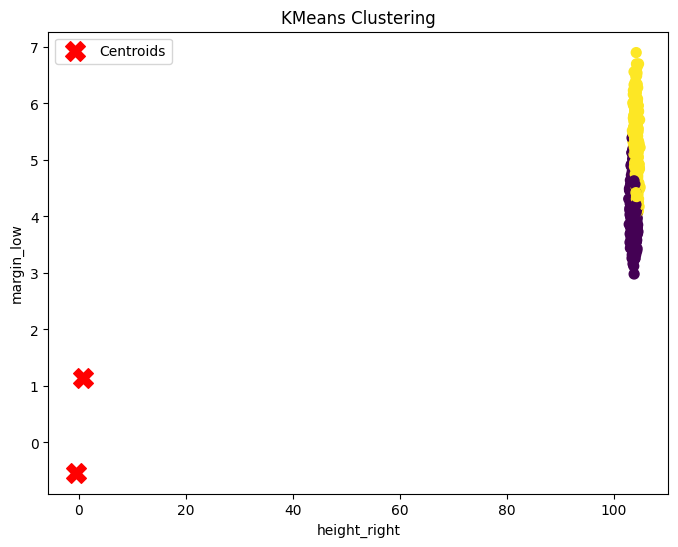

In [103]:



# Prédiction des clusters
clusters = pipeline_kmean.predict(X_kmeans )

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(X_kmeans.iloc[:, 0], X_kmeans.iloc[:, 1], c=clusters, cmap='viridis', s=50)

# Récupération des centres
centers = pipeline_kmean.named_steps['model'].cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Centroids')

plt.xlabel(X_kmeans.columns[0])
plt.ylabel(X_kmeans.columns[1])
plt.title("KMeans Clustering")
plt.legend()
plt.show()


In [104]:
#print(confusion_matrix(df_prediction["is_genuine"], df_prediction["clusters"]))
#print("ARI (Adjusted Rand Index) :", adjusted_rand_score(df_prediction["is_genuine"], df_prediction["clusters"]))

y_pred_kmean = pipeline_kmean.predict(X_test)
print(confusion_matrix(y_test, y_pred_kmean))
print(classification_report(y_test, y_pred_kmean))
print("Accuracy (KMeans):", accuracy_score(y_test, y_pred_kmean))


[[ 23 127]
 [284  16]]
              precision    recall  f1-score   support

           0       0.07      0.15      0.10       150
           1       0.11      0.05      0.07       300

    accuracy                           0.09       450
   macro avg       0.09      0.10      0.09       450
weighted avg       0.10      0.09      0.08       450

Accuracy (KMeans): 0.08666666666666667


L'analyse de ces résultats montre que le KMeans nest pas performant sur les données.

In [135]:
# analyses
#scatterplot kmeans


<div style="border: 2px solid rgb(0,150,250); padding: 15px; margin-top: 10px;">
  <h3 style="margin: 0; color: rgb(0,150,250);">Modèle Random Forest</h3>
</div>

Random forest

In [105]:

pipeline_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestClassifier(n_estimators =100,
                                  class_weight = "balanced",
                                  random_state = 42)
)])

In [106]:
pipeline_rf.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [107]:
y_pred_rf = pipeline_rf.predict(X_test)
y_pred_proba_rf = pipeline_rf.predict_proba(X_test)

In [108]:
rapport_classificatiion_rf = classification_report(y_test,y_pred_rf)
matrice_confusion_rf = confusion_matrix(y_test,y_pred_rf)
auc = accuracy_score(y_test,y_pred_rf)
print( "matrice de confusion:\n",matrice_confusion_rf)
print( "\nrapport de classificatiion :\n",rapport_classificatiion_rf)
print( "\naccuracy :\n",auc)

matrice de confusion:
 [[124  26]
 [ 11 289]]

rapport de classificatiion :
               precision    recall  f1-score   support

           0       0.92      0.83      0.87       150
           1       0.92      0.96      0.94       300

    accuracy                           0.92       450
   macro avg       0.92      0.90      0.91       450
weighted avg       0.92      0.92      0.92       450


accuracy :
 0.9177777777777778


In [174]:
x_new = np.array([107.6,108.2,7.3,6.7,107]).reshape(1,-1)

model_rf.predict(new)

NameError: name 'new' is not defined

<div style="border: 2px solid rgb(0,150,250); padding: 15px; margin-top: 10px;">
  <h3 style="margin: 0; color: rgb(0,150,250);">Analyse des performances des modèles estimés </h3>
</div>


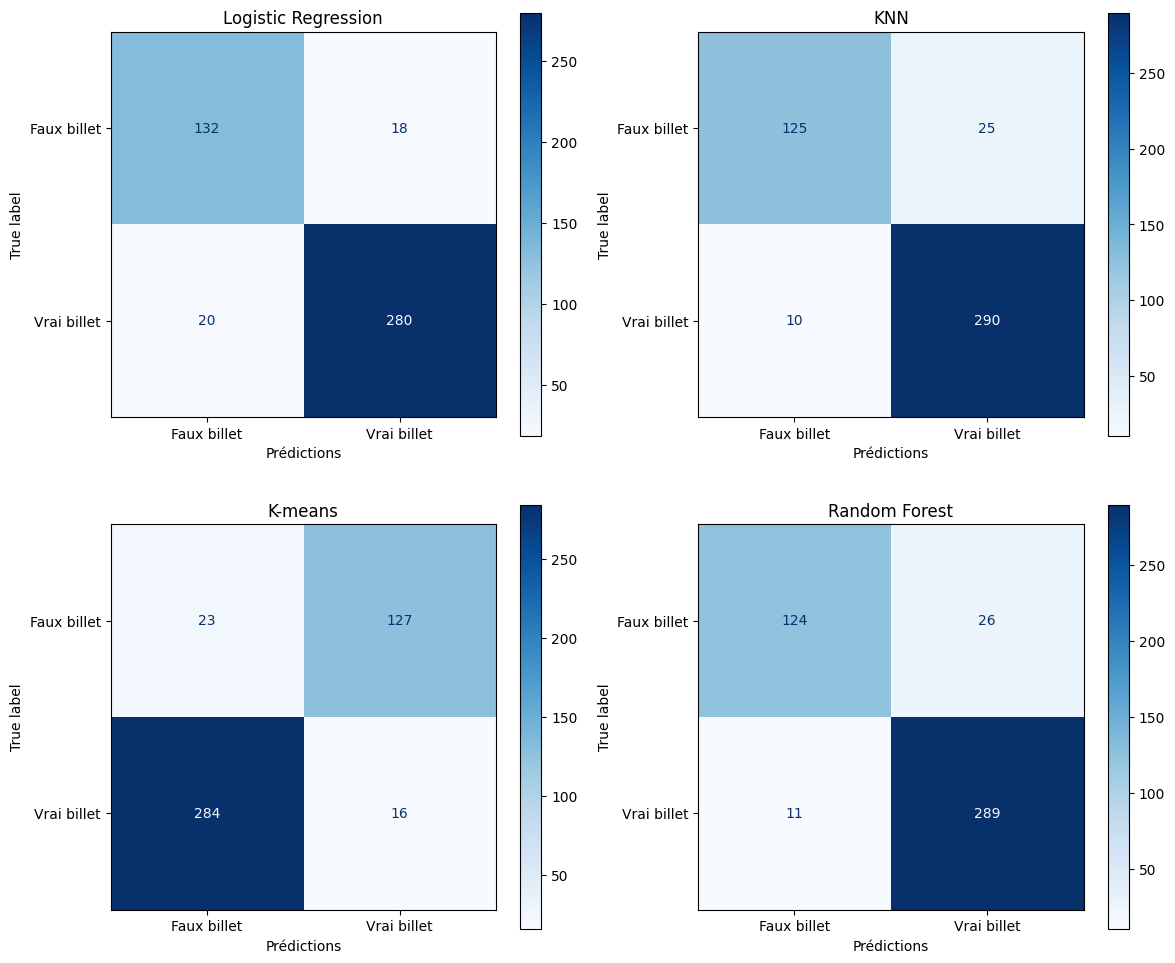

In [110]:


from sklearn.metrics import ConfusionMatrixDisplay

models = {
    "Logistic Regression": y_pred_log,
    "KNN": y_pred_knn,
    "K-means": y_pred_kmean,
    "Random Forest": y_pred_rf,
   
}


fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()


for i, (name, y_pred) in enumerate(models.items()):
    # Prédictions
    #y_pred = model.predict(X_test)

    # Matrice de confusion
    cm = confusion_matrix(y_test, y_pred)
    
    # Affichage
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Faux billet", "Vrai billet"])
    disp.plot(ax=axes[i], cmap="Blues", values_format='d')
    axes[i].set_title(f"{name}")
    axes[i].set_xlabel("Prédictions")

# Ajustement de l'affichage
plt.tight_layout()
plt.show()


L'analyse des différents AUC montre que les modéles les plus performants sont :la regression logistique,le KnearestKNeighbors et le Random forest avec des scores respectifs de 0.9155, 0.92 ,0.9177.s Cependant,étant dans une logique de détection de faux billets,l'objectif principal est de réduire le nombres de faux positifs notament de faux billets identifiés comme des vrais billets. 
Le modèle qui minimise le meiux ce risque  ce risque parmi les modèles estimés plus hautest le modèle logistique

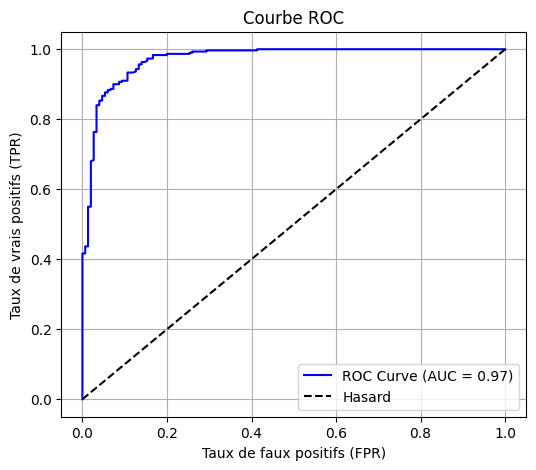

In [111]:
#AUC model logistic
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt


fpr, tpr, seuils = roc_curve(y_test, y_pred_proba_log[:,1])
auc = roc_auc_score(y_test, y_pred_proba_log[:,1])

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})", color="blue")
plt.plot([0, 1], [0, 1], 'k--', label="Hasard")
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Courbe ROC")
plt.legend()
plt.grid()
plt.show()


<div style="border: 2px solid rgb(0,150,250); padding: 15px; margin-top: 10px;">
  <h3 style="margin: 0; color: rgb(0,150,250);">Analyse de la robustesse du modèle logistique </h3>
</div>


In [112]:
# 
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, roc_auc_score




# Définir le nombre de folds
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Utiliser AUC comme métrique
auc_scores = cross_val_score(
    pipeline_log,
    X,
    y,
    cv=cv,
    scoring='roc_auc'
)

print("AUC pour chaque fold :", auc_scores)
print("AUC moyenne (CV) :", np.mean(auc_scores))


AUC pour chaque fold : [0.97035 0.96415 0.97065 0.9688  0.97725]
AUC moyenne (CV) : 0.9702399999999999


La cross validation permet de ..

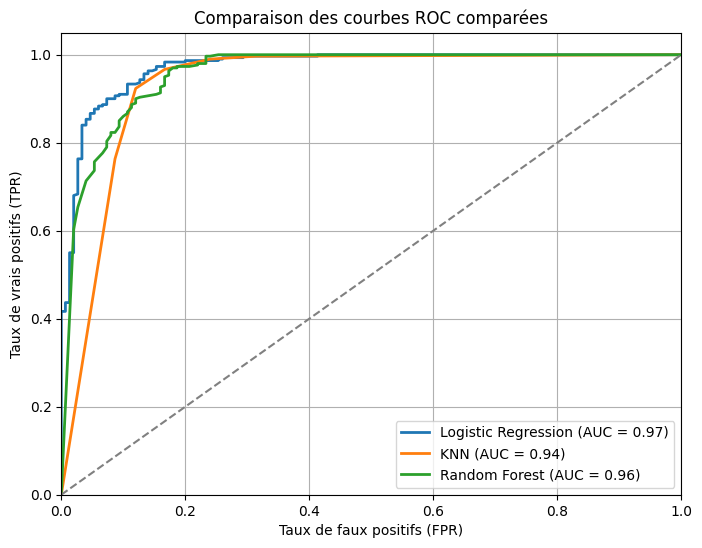

In [114]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Supposons que tu as :
# y_test : tes vraies classes
# y_proba1, y_proba2, y_proba3 : probabilités prédites par chaque modèle

# Exemple : dictionnaire de modèles
model_results = {
    "Logistic Regression": y_pred_proba_log,
      "KNN": y_pred_proba_knn,
    "Random Forest": y_pred_proba_rf,
  
}

# Tracer les courbes
plt.figure(figsize=(8, 6))

for name, y_proba in model_results.items():
    fpr, tpr, _ = roc_curve(y_test, y_proba[:,1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.2f})")

# Diagonale (modèle aléatoire)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taux de faux positifs (FPR)")
plt.ylabel("Taux de vrais positifs (TPR)")
plt.title("Comparaison des courbes ROC comparées")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [54]:
new_data = np.array([101.3, 2.1])  # Exemple de nouvelles données
# Prédiction avec le modèle de régression logistique
new_prediction_log = pipeline_log.predict(new_data) 


/opt/anaconda3/envs/finances_venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


ValueError: Expected 2D array, got 1D array instead:
array=[101.3   2.1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [55]:


def evaluer_modele_csv(data, pipeline_log):
    """
    Applique un pipeline entraîné sur un fichier CSV ou un DataFrame.
    
    Params :
    - data : str (chemin CSV) ou pd.DataFrame
    - pipeline_log : pipeline entraîné (ex: scaler + modèle)

    Retour :
    - DataFrame avec les colonnes initiales + 'prediction' + 'probabilités'
    """
    
    # Charger les données si c'est un chemin
    if isinstance(data, str):
        df = pd.read_csv(data)
    else:
        df = data.copy()

    # Colonnes à conserver (input features connues du pipeline)
    colonnes_entree = ["height_right", "margin_low"]

    # Vérification des colonnes disponibles
    colonnes_disponibles = [col for col in colonnes_entree if col in df.columns]
    
    # Compléter les features manquantes si besoin
    for col in colonnes_entree:
        if col not in df.columns:
            df[col] = 0  # ou np.nan selon le contexte

    # Traitement des valeurs manquantes
    if "margin_low" in df.columns:
        df["margin_low"] = df["margin_low"].fillna(df["margin_low"].median())

    # Prédictions
    X = df[colonnes_entree]
    df["prediction"] = pipeline_log.predict(X)
    df["probabilités"] = pipeline_log.predict_proba(X)[:, 1]
    roc_auc = roc_auc_score(df["is_genuine"], df["probabilités"])
    
    return df,"\nLe roc_auc est de {:.2f}".format(roc_auc)


In [115]:
new_data = X_test.head(n=10) #random_state=42)
#evaluer_modele_csv(new_data,pipeline_log=pipeline_log)
predict_x = pipeline_log.predict(new_data)
print(predict_x)
#print(y.head(10))
prdict_prob = pipeline_log.predict_proba(new_data)
#print(prdict_prob[:,1] )

[1 1 1 1 0 1 1 1 0 0]


In [117]:
df_new_data = new_data.copy()
df_new_data ["predictions"] = predict_x
df_new_data ["Probabilites predictions"] = prdict_prob[:,1]
auc = accuracy_score(y_test.head(10),predict_x)
roc_auc = roc_auc_score(y_test.head(10),predict_x)
print(df_new_data)

print(f"auc : {auc}")
print(f"roc_auc : {roc_auc}")

      height_right  margin_low  predictions  Probabilites predictions
913         103.83        4.39            1                  0.812646
655         103.90        3.97            1                  0.969581
475         103.64        4.12            1                  0.973363
663         103.65        3.73            1                  0.996492
1254        104.30        6.49            0                  0.000010
278         103.50        4.31            1                  0.956376
587         103.52        3.94            1                  0.993275
723         103.89        4.22            1                  0.896618
416         104.25        4.53            0                  0.310207
1337        104.07        4.52            0                  0.476177
auc : 0.9
roc_auc : 0.9375


In [72]:
print(pd.concat([X_test.head(10), y_test.head(10)], axis=1))

      height_right  margin_low  is_genuine
803         104.50        3.85           1
1306        104.06        5.80           0
1263        104.40        5.05           0
38          104.27        4.42           1
257         104.25        4.17           1
395         103.83        3.92           1
834         104.34        4.34           1
606         103.96        3.43           1
397         103.53        3.92           1
11          104.00        3.88           1


In [153]:
new_data.to_csv("new_data.csv", index=False, sep=";")

In [119]:
new_data1= X_test.sample(n=10) #random_state=42)
#evaluer_modele_csv(new_data,pipeline_log=pipeline_log)
predict_x = pipeline_log.predict(new_data1)
print(predict_x)
#print(y.head(10))
prdict_prob = pipeline_log.predict_proba(new_data1)
#print(prdict_prob[:,1] )

[1 1 1 1 0 0 1 1 1 0]


In [120]:
df_new_data1 = new_data1.copy()
df_new_data1 ["predictions"] = predict_x
df_new_data1 ["Probabilites predictions"] = prdict_prob[:,1]
auc1 = accuracy_score(y_test.head(10),predict_x)
roc_auc1 = roc_auc_score(y_test.head(10),predict_x)
print(df_new_data1)

print(f"auc : {auc1}")
print(f"roc_auc : {roc_auc1}")

      height_right  margin_low  predictions  Probabilites predictions
125         103.97        3.26            1                  0.999096
688         103.43        4.19            1                  0.981703
232         104.06        3.77            1                  0.981183
762         103.57        4.50            1                  0.860323
1062        103.96        5.37            0                  0.014115
1080        104.29        5.61            0                  0.001202
498         103.68        4.07            1                  0.976374
899         104.05        4.26            1                  0.797079
384         103.24        3.82            1                  0.998706
1313        104.01        5.59            0                  0.003669
auc : 0.9
roc_auc : 0.9375


In [127]:
"""nouvelle_data = pd.read_csv("nouvelle_donnee.csv", sep=";")
nouvelle_data  = nouvelle_data.drop(columns = ["diagonal","length","margin_up","height_left","is_genuine"])
predict_x_n= pipeline_log.predict(nouvelle_data)
print(predict_x)
#print(y.head(10))
prdict_prob_n = pipeline_log.predict_proba(nouvelle_data)
#print(prdict_prob[:,1] )
"""

[1 1 0 0 1 0 0 1 1 0]


In [128]:
"""df_nouvelle_donnee = nouvelle_data.copy()
df_nouvelle_donnee ["predictions"] = predict_x
df_nouvelle_donnee ["Probabilites predictions"] = prdict_prob[:,1]
auc1 = accuracy_score(y_test.head(10),predict_x_n)
roc_auc1 = roc_auc_score(y_test.head(10),predict_x_n)
print(df_nouvelle_donnee)

print(f"auc : {auc1}")
print(f"roc_auc : {roc_auc1}")
"""

   height_right  margin_low  predictions  Probabilites predictions
0         44.12        1.39            1              1.000000e+00
1         35.78       11.55            1              1.000000e+00
2        111.33        9.04            0              1.158823e-22
3        233.57       16.11            0             7.008697e-231
4         73.54        2.77            1              1.000000e+00
5        120.74        6.33            0              3.962241e-31
6        114.04       22.41            0              5.517456e-58
7         93.99        0.43            1              1.000000e+00
8         11.88       14.44            1              1.000000e+00
9        193.41        2.88            0             3.978829e-137
auc : 0.5
roc_auc : 0.5


In [134]:
import joblib

joblib.dump(pipeline_log, "model_detection_faux_billets.pkl")


['model_detection_faux_billets.pkl']